In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

In [2]:
stokes = fits.open('../data/20230827_063305/20230827_063305_correct.fits')[0].data
stokes.shape

(768, 758, 4, 112)

In [40]:
fits.open('../data/20230827_063305/SP3D20230827_063305.0C.fits')[0].header

SIMPLE  =                    T /image conforms to FITS standard                 
BITPIX  =                   16 /bits per data value                             
NAXIS   =                    3 /number of axes                                  
NAXIS1  =                  112 /                                                
NAXIS2  =                  768 /                                                
NAXIS3  =                    4 /                                                
EXTEND  =                    T /file may contain extensions                     
DATE    = '2023-09-01T04:20:31.000' /                                           
DATE_RF0= '2023-09-01T04:20:31.000' /                                           
TELESCOP= 'HINODE  '           /                                                
INSTRUME= 'SOT/SP  '           /                                                
MDP_CLK =           2958679159 /                                                
ORIGIN  = 'JAXA/ISAS, SIRIUS

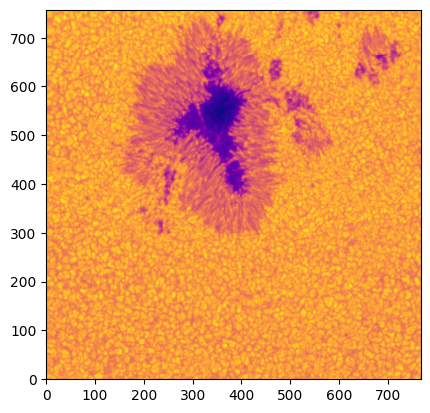

In [6]:
plt.imshow(stokes[:,:,0,0].T, origin='lower', cmap='plasma')

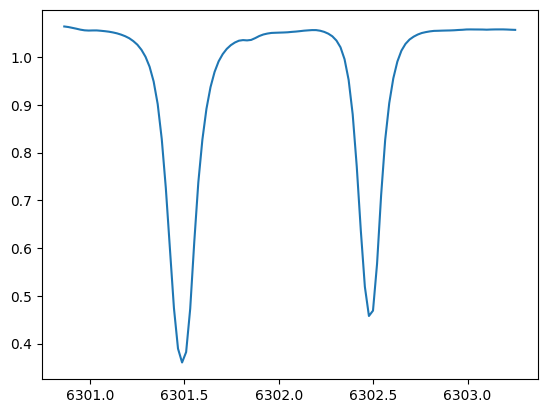

In [11]:
mean_spectrum = np.mean(stokes[:,:,0,:],axis=(0,1))
plt.plot(ll,mean_spectrum)

In [8]:
mean_continuum = np.mean(stokes[500:,:200,0,:-10])
stokes /= mean_continuum

In [12]:
myhdu = fits.PrimaryHDU(stokes)
myhdu.writeto("../data/20230827_063305/20230827_063305_normalize.fits",overwrite=True)

find the wavelength in the header(fits.open()[0].header). ll = CRVAL1 + (np.arange()-CRPIX1) * CDELT1
notice SPBSHFT value for correction

In [10]:
ll = 6302.08 + (np.arange(112)-56.5)*0.0215 

here is the inversion results.

In [98]:
model = fits.open("H://codes//data/20230827_063305_normalize_inverted.fits")[0].data
model1 = fits.open("H://codes//data/20230827_063305_normalize_converted_0.2_inverted.fits")[0].data
model2 = fits.open("H://codes//data/20230827_063305_normalize_converted_0.1_inverted.fits")[0].data

In [99]:
Bz = model[:,:,0]*np.cos(model[:,:,1])
Bz1 = model1[:,:,0]*np.cos(model1[:,:,1])
Bz2 = model2[:,:,0]*np.cos(model2[:,:,1])
Bh = model[:,:,0]*np.sin(model[:,:,2])
Bh1 = model1[:,:,0]*np.sin(model1[:,:,2])
Bh2 = model2[:,:,0]*np.sin(model2[:,:,2])

167.56573348122615
152.23556444738298
138.63641809460475


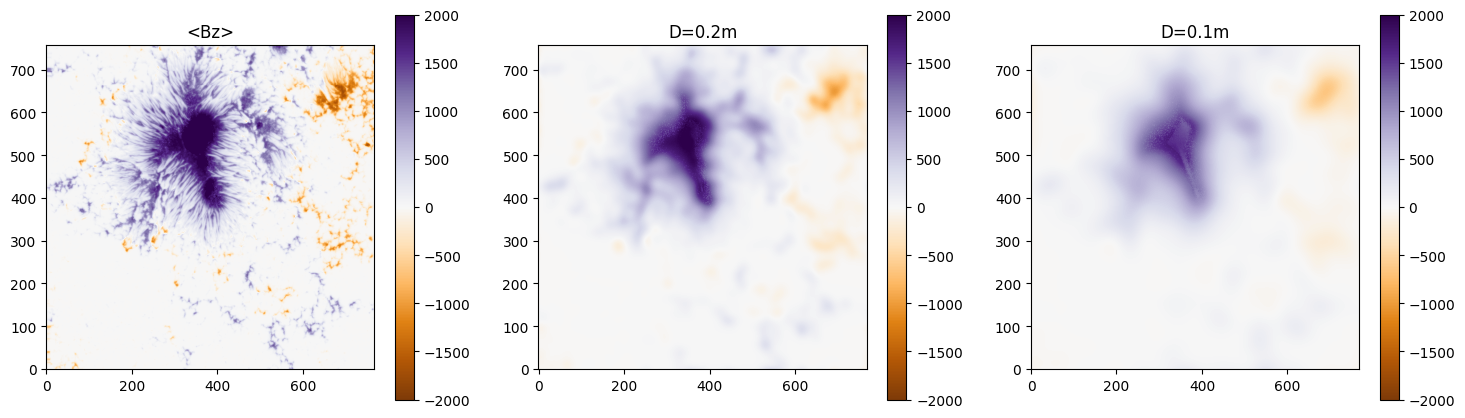

In [102]:
plt.figure(figsize=[18,5])
plt.subplot(131)
plt.imshow(Bz[:,:].T,cmap='PuOr',origin='lower',vmin=-2000,vmax=2000)
plt.title('<Bz>')
plt.colorbar()
plt.subplot(132)
plt.imshow(Bz1[:,:].T,cmap='PuOr',origin='lower',vmin=-2000,vmax=2000)
plt.title('D=0.2m')
plt.colorbar()
plt.subplot(133)
plt.imshow(Bz2[:,:].T,cmap='PuOr',origin='lower',vmin=-2000,vmax=2000)
plt.title('D=0.1m')
plt.colorbar()
print(np.mean(Bz[:,:]))
print(np.mean(Bz1[:,:]))
print(np.mean(Bz2[:,:]))

In [90]:
1-np.mean(Bz1)/np.mean(Bz)

0.09148749398432787

271.4475233274929


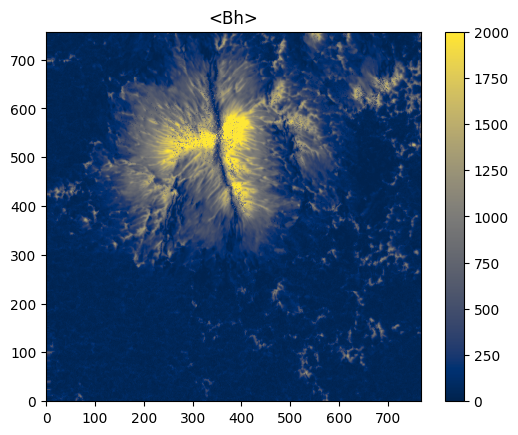

In [62]:
plt.imshow(Bh[:,:].T,cmap='cividis',origin='lower', vmax=2000)
plt.title('<Bh>')
plt.colorbar()
print(np.mean(Bh))

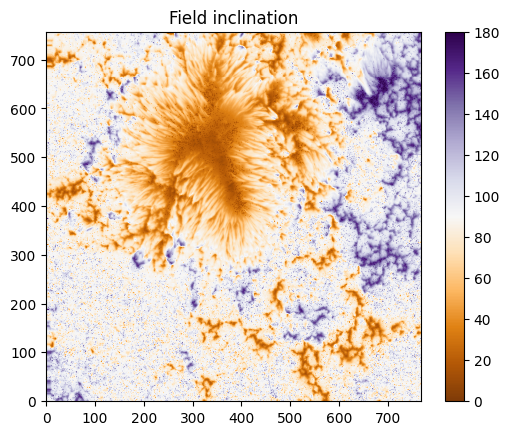

In [63]:
plt.imshow(model[:,:,1].T*180./np.pi,cmap='PuOr',origin='lower')
plt.title("Field inclination")
plt.colorbar()

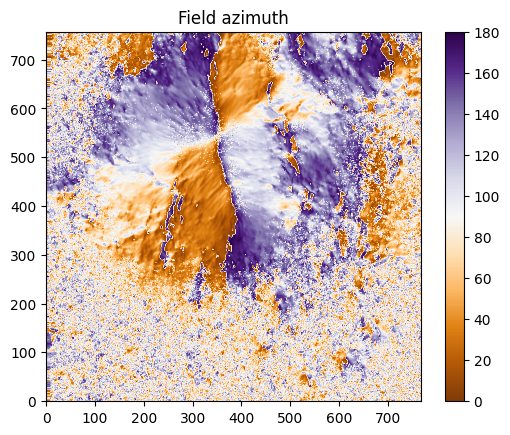

In [64]:
plt.imshow(model[:,:,2].T*180./np.pi,cmap='PuOr',origin='lower')
plt.title("Field azimuth")
plt.colorbar()

In [69]:
nx = 768
ny = 768

np.zeros([round(nx/2),round(ny/2)]).shape


(384, 384)

In [72]:
int(3.54)

3

In [75]:
test = fits.open("H://codes//data/20230827_063305_normalize_converted_0.2.fits")[1].data
test.shape

(768, 758, 4, 112)

In [91]:
gamma = model[:,:,1]*180./np.pi
gamma = gamma.flatten()
gamma1 = model1[:,:,1]*180./np.pi
gamma1 = gamma1.flatten()
gamma2 = model2[:,:,1]*180./np.pi
gamma2 = gamma2.flatten()

Text(0.5, 1.0, 'Original')

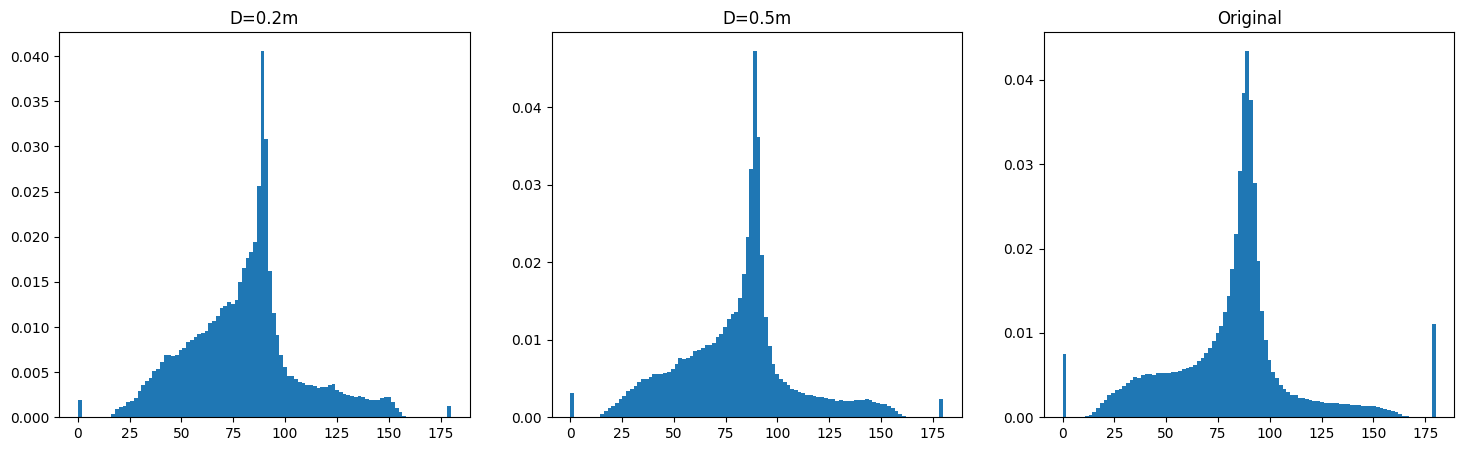

In [94]:
plt.figure(figsize=[18,5])
plt.subplot(131)
plt.hist(gamma1,density=True,bins=100)
plt.title('D=0.2m')
plt.subplot(132)
plt.hist(gamma2,density=True,bins=100)
plt.title('D=0.5m')
plt.subplot(133)
plt.hist(gamma,density=True,bins=100)
plt.title('Original')

In [104]:
gamma1 = np.array([])
for i in range(768):
    for j in range(758):
        if model1[i,j,0] > 100:
            gamma1  = np.append(gamma1, model1[i,j,1]*180./np.pi)


In [117]:
gamma2 = np.array([])
for i in range(768):
    for j in range(758):
        if model2[i,j,0] > 100:
            gamma2  = np.append(gamma2, model2[i,j,1]*180./np.pi)


In [101]:
gamma = np.array([])
for i in range(768):
    for j in range(758):
        if model[i,j,0] > 100:
            gamma  = np.append(gamma, model[i,j,1]*180./np.pi)


In [122]:
print(gamma.shape)
print(gamma1.shape)
print(gamma2.shape)

(411546,)
(362762,)
(369682,)


Text(0.5, 1.0, 'D=0.1m')

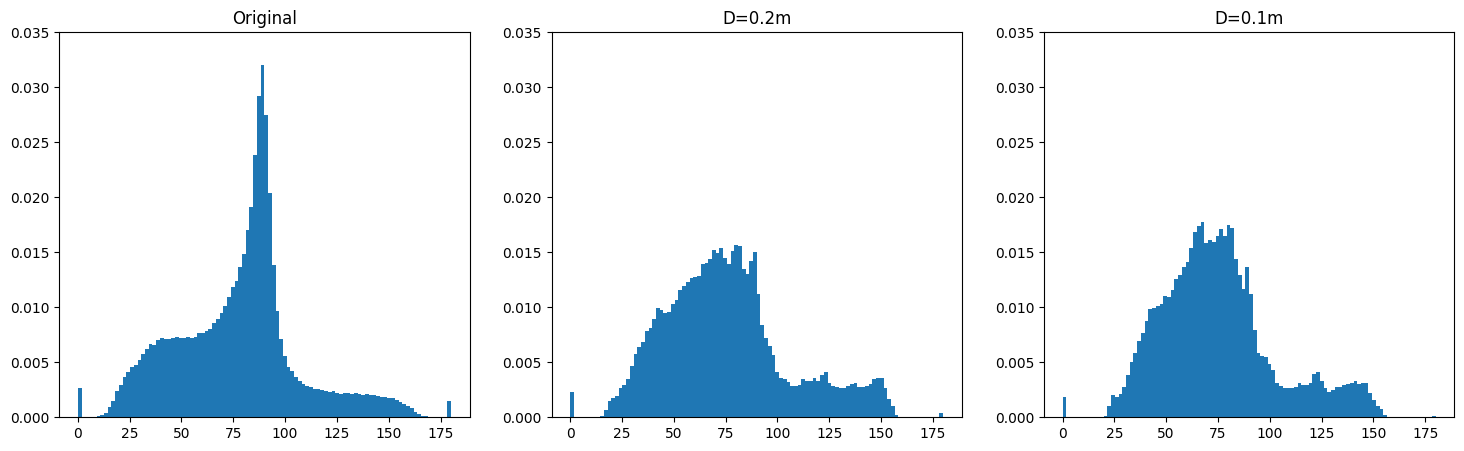

In [121]:
plt.figure(figsize=[18,5])
plt.subplot(131)
plt.hist(gamma,density=True,bins=100)
plt.ylim([0,0.035])
plt.title('Original')
plt.subplot(132)
plt.hist(gamma1,density=True,bins=100)
plt.ylim([0,0.035])
plt.title('D=0.2m')
plt.subplot(133)
plt.hist(gamma2,density=True,bins=100)
plt.ylim([0,0.035])
plt.title('D=0.1m')

In [123]:
print(np.std(Bz))
print(np.std(Bz1))
print(np.std(Bz2))

469.3698899127061
377.6308105343094
315.95520815643965


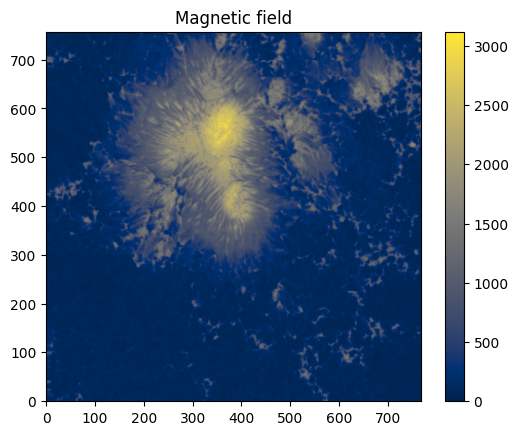

In [124]:
plt.imshow(model[:,:,0].T, origin='lower', cmap='cividis')
plt.title('Magnetic field')
plt.colorbar()